In [11]:
import librosa
import librosa.display

import matplotlib.pyplot as plt
import numpy as np

from os import walk
from os.path import join
from pathlib import Path

In [2]:
folder = Path(Path.home(),'Documents','Machine Learning','Music Travel Project','Test files - Pre processing')
songs_files = next(walk(folder), (None, None, []))[2]
print(songs_files)

['02 - Brisa.aiff', '05 - Pagan Poetry.flac', '08 - Riez.mp3', 'Pre-processing audio.ipynb']


08 - Riez.mp3
22050


<function matplotlib.pyplot.show(close=None, block=None)>

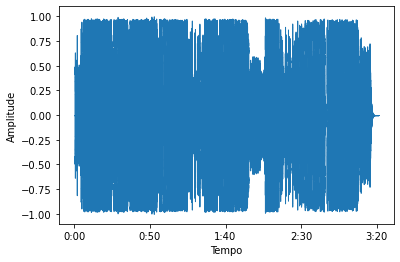

In [38]:
i = 2
path_file = Path(folder,songs_files[i])

audio_signal, samplerate = librosa.load(path_file)

print(songs_files[i])
print(samplerate)
librosa.display.waveshow(audio_signal, sr=samplerate)
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

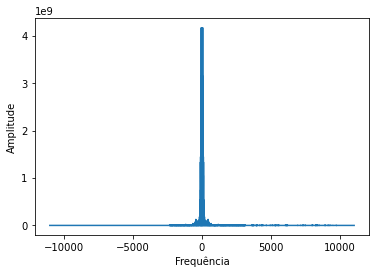

In [39]:
FFT = np.fft.fft(audio_signal)
FFT_reversed = [*FFT[len(FFT)//2:],*FFT[:len(FFT)//2]]

f = np.linspace(-samplerate//2, samplerate//2, len(FFT_reversed))

plt.plot(f,np.abs(FFT_reversed)**2)
plt.xlabel("Frequência")
plt.ylabel("Amplitude")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

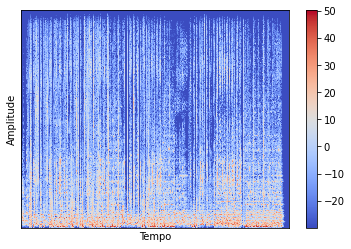

In [46]:
samples_window = 2048
hop_length = 512

STFT = librosa.core.stft(audio_signal, hop_length=hop_length, n_fft=samples_window)

S = np.abs(STFT)
S_log = librosa.amplitude_to_db(S)

librosa.display.specshow(S_log, sr=samplerate)
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.colorbar()
plt.show

C:\Users\Tiago\AppData\Local\Temp/ipykernel_8420/1188129214.py:1: FutureWarning: Pass y=[ 6.5085296e-05  2.1102724e-06  1.9368637e-05 ...  2.9422617e-06
 -4.3250730e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFFC = librosa.feature.mfcc(audio_signal, hop_length=hop_length, n_fft=samples_window, n_mfcc = 15)


<function matplotlib.pyplot.show(close=None, block=None)>

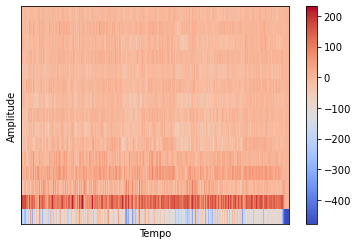

In [48]:
MFFC = librosa.feature.mfcc(audio_signal, hop_length=hop_length, n_fft=samples_window, n_mfcc = 15)

librosa.display.specshow(MFFC, sr=samplerate)
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.colorbar()
plt.show